In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1: Classification of handwritten digits

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a large [database](http://yann.lecun.com/exdb/mnist/) of small images of digits handwritten by high school students and employees of the US Census Bureau.

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

This dataset contains 5,000 images, and each image has 784 features. 
This is because each image is 28×28  pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 1 (black).

In [4]:
X.shape

(5000, 784)

Let's take a peek at one digit from the dataset. All we need to do is grab a row of $X$, reshape it to a  28×28  array, and display it using ${\tt imshow()}$.

(-0.5, 27.5, 27.5, -0.5)

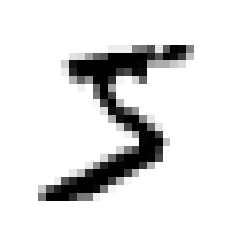

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')

This looks like a 5, and indeed that's what the label tells us

In [6]:
y[0]

5

The following figure shows a few more images from the dataset

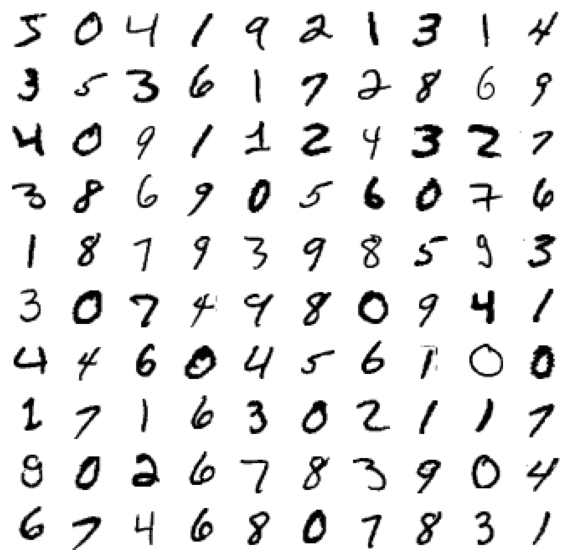

In [7]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The **goal** of this problem is to fit a linear regression model to identify one digit--for example, the number 0.
This 0-detector will be capable of distinguishing between just two classes, 0 and not-0.

Let's create a (0,1)-vector y_0, where its $i$th entry is given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if digit $i$ is a zero}\\
0 & \mbox{ if digit $i$ is not a zero}. \end{array}\right.
$$

In [8]:
y_0 = np.zeros(len(y))
y_0[y==0]=1 # 1 for all 0s, 0 for all other digits

## Part 1

Use the data (X,y_0) to fit a linear regression model that predicts the vector y_0. 
Please, use **Gradient Descent** to fit the model. 

In [9]:
# gradient descent function from class
def linregression_GD(X,y,learning_rate, momentum=0, n_epochs = 100, return_MSE=False, test_data = None, theta_start = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - momentum: momentum coefficient (default 0)
    - epochs: number of Gradient Descent iterations (defualt 100)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    - test_data: data (X_test,y_test) for monitoring overfitting
    - theta_start: initial theta vector (if None, random)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    
    if theta_start is None:
        theta = np.random.randn(n) # random initialization
    else:
        theta = theta_start
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    # initialize MSE_test vector (only if test_data not None)
    if test_data:
        X_test,y_test = test_data
        m_test = len(y_test)
        MSE_test = np.zeros(n_epochs)
    
    # initialize directions
    d_current = np.zeros(n)
    d_previous = np.zeros(n)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y) # gradient of the mse function
        
        d_current = gradient + momentum*d_previous  # new direction
        theta = theta - learning_rate*d_current # update the vector theta
        
        d_previous = d_current # update direction
        
        # compute mean squared error (only if return_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
        # compute mean squared error on test set (only if test_data is not None)
        if test_data:
            MSE_test[epoch] = np.linalg.norm(y_test-X_test.dot(theta))**2/m_test
    
    results = {}
    results['coeff'] = theta
    if return_MSE:
        results['error'] = MSE
    if test_data:
        results['test_error'] = MSE_test
    return results

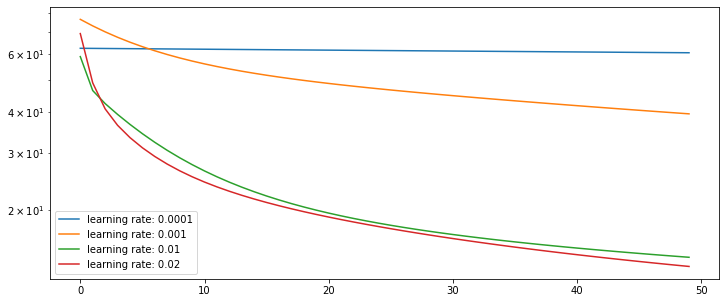

In [10]:
# determine the correct lerning rate:
learning_rates = [0.0001,0.001, 0.01, 0.02] #  
plt.figure(figsize=(12,5))
for lr in learning_rates:
    results = linregression_GD(X,y,
                              learning_rate = lr,
                              momentum=0,
                              n_epochs=50,
                              return_MSE=True)
    MSE = results['error']
    plt.semilogy(MSE, label = 'learning rate: '+str(lr))
plt.legend()

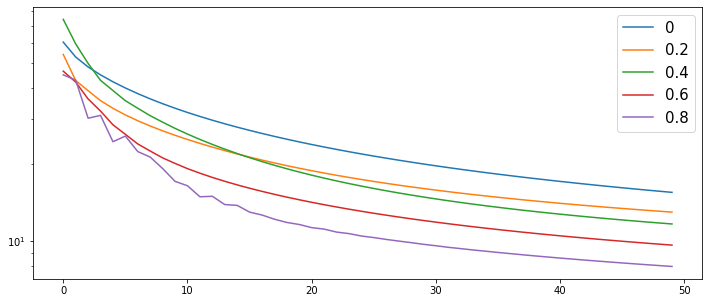

In [12]:
# optimal learning rate = 0.02. 
lr = 0.02
# Maybe momentum can accelerate convergence
betas = [0,0.2,0.4,0.6,0.8] # momentum coefficients
plt.figure(figsize=(12,5))
for b in betas:
    results = linregression_GD(X,y,
                              learning_rate = lr,
                              momentum=b,
                              n_epochs=50,
                              return_MSE=True)
    MSE = results['error']
    plt.semilogy(MSE, label=str(b))
plt.legend(fontsize=15)

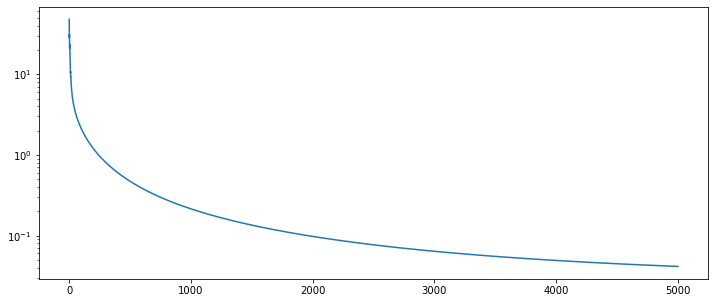

In [13]:
# optimal learning rate
lr = 0.02
# optimal momentum coefficient
b = 0.8
results = linregression_GD(X,y_0,
                           learning_rate = lr,
                           momentum=b,
                           n_epochs=5000,
                           return_MSE=True)
MSE = results['error']
plt.figure(figsize=(12,5))
plt.semilogy(MSE, label=str(b))

## Part 2

Use your linear regression model to classify all the digits in the following test set

In [14]:
# load the test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
data_test = pd.read_csv(url)
data_test.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
X_test = data_test.iloc[:,0:784].to_numpy() # pixels
y_test = data_test['label'].to_numpy() # labels

In [16]:
y_0_test = np.zeros(len(y_test))
y_0_test[y_test==0]=1 # 1 for all 0s, 0 for all other digits

Use the folloging **classification rule**:

$$
\mbox{classify digit $i$ as a }\left\{ \begin{array}{ll} 
0 & \mbox{ if predicted y_0_test}[i]>0.5 \\
\mbox{non-}0 & \mbox{ if predicted y_0_test}[i]\leq 0.5
\end{array}\right.
$$

In [17]:
# linear model coefficients 
theta = results['coeff']

In [18]:
# use the linear model to predict y_0_test
y_0_test_pred = X_test.dot(theta)

In [19]:
# apply classification rule
y_0_test_pred[y_0_test_pred>0.5]=1
y_0_test_pred[y_0_test_pred<=0.5] = 0

In [21]:
# percentage of correct classifications
100*np.sum(y_0_test==y_0_test_pred)/len(y_0_test)

95.85

In [22]:
# confusion matrix
n_classes = 2
C = np.zeros((2,2))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_0_test_pred[y_0_test==i]==j)
C

array([[1762.,   33.],
       [  50.,  155.]])